The following is an analysis of the latitudinal distribution of hexactinellids as compared with demosponges.

In [2]:
#Imports for statistical analysis and database management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

The data used here comes from the GPlatesPortal Seafloor Lithology Map (https://portal.gplates.org/portal/seafloor/).

In [3]:
df=pd.read_csv('deep_sea_coral_sponge_data.csv')

C:\Users\Sam She\AppData\Local\Temp\ipykernel_23748\2917557790.py:1: DtypeWarning: Columns (5,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('deep_sea_coral_sponge_data.csv')


In [4]:
#list of higher sponge clades present
target_sponge_name_list=['demosponge','glass sponge','homoscleromorph sponge','calcareous sponge']

#create dataframe of just sponges
sponge_df=df[df.VernacularNameCategory=='sponge (unspecified)']
for name in target_sponge_name_list:
    sponge_df=pd.concat([sponge_df,df[df.VernacularNameCategory==name]])

In [5]:
#seperate sponges based on higher clade
uncat_df=df[df.VernacularNameCategory=='sponge (unspecified)']
demo_df=df[df.VernacularNameCategory=='demosponge']
glass_df=df[df.VernacularNameCategory=='glass sponge']
homo_df=df[df.VernacularNameCategory=='homoscleromorph sponge']
calc_df=df[df.VernacularNameCategory=='calcareous sponge']

In [5]:
#Latitudinal bins created to keep bins consistant among graphs and once it was realized that the South Hemisphere data was sparse.
lat_bins=range(0,80,5)

Text(0, 0.5, 'Number of Sponges')

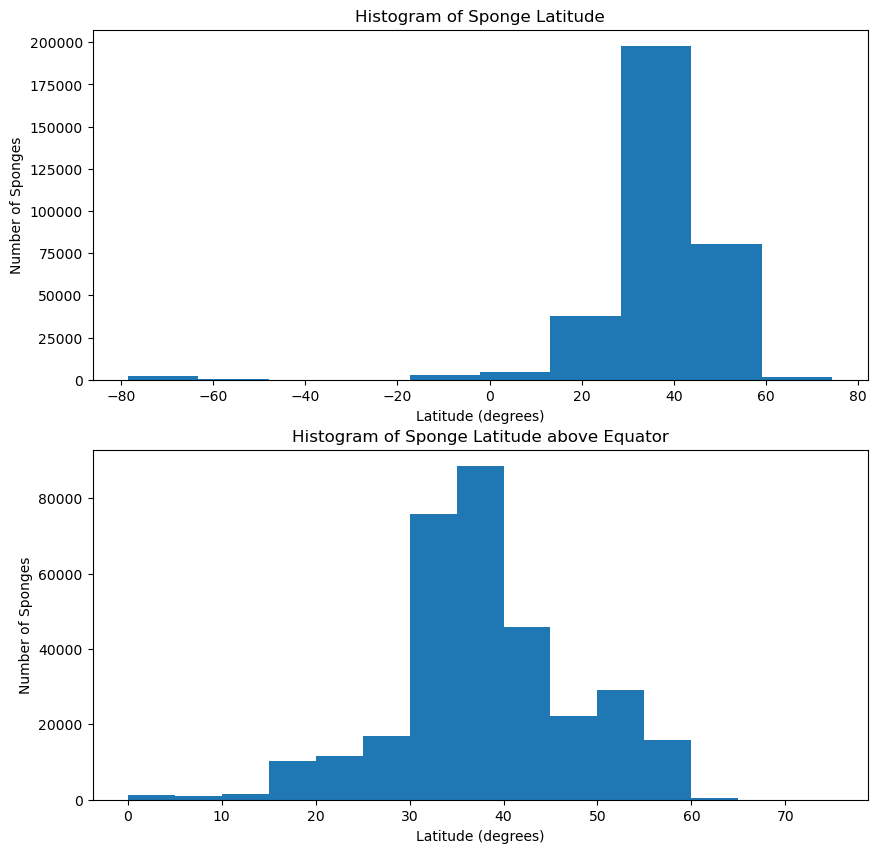

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.hist(sponge_df.latitude)
plt.title("Histogram of Sponge Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")

plt.subplot(2,1,2)
plt.hist(sponge_df.latitude,bins=lat_bins)
plt.title("Histogram of Sponge Latitude above Equator")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")

The above histograms show the overall sponge latitude distribution of the sample. It is somewhat expected that the Northern Hemisphere will be more heavily surveyed, so this does not necessarily represent the distribution of sponges. These histograms will be included in further histograms to compare different classes of sponges against. However, the Southern Hemisphere is so poorly sampled in this dataset, that histograms are included which exclude the Southern Hemisphere.

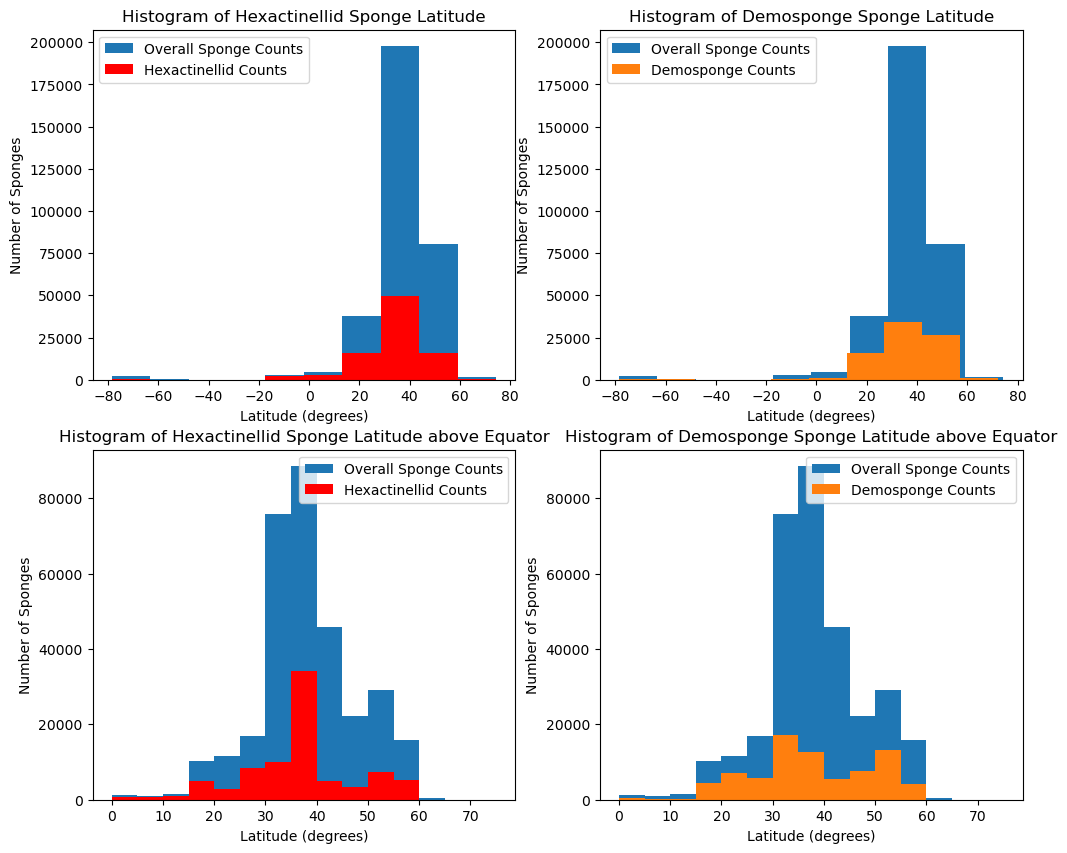

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.hist(sponge_df.latitude,label="Overall Sponge Counts")
plt.hist(glass_df.latitude,label="Hexactinellid Counts",color="red")
plt.title("Histogram of Hexactinellid Sponge Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,2)
plt.hist(sponge_df.latitude,label="Overall Sponge Counts")
plt.hist(demo_df.latitude,label="Demosponge Counts")
plt.title("Histogram of Demosponge Sponge Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,3)
plt.hist(sponge_df.latitude,label="Overall Sponge Counts",bins=lat_bins)
plt.hist(glass_df.latitude,label="Hexactinellid Counts",color="red",bins=lat_bins)
plt.title("Histogram of Hexactinellid Sponge Latitude above Equator")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,4)
plt.hist(sponge_df.latitude,label="Overall Sponge Counts",bins=lat_bins)
plt.hist(demo_df.latitude,label="Demosponge Counts",bins=lat_bins)
plt.title("Histogram of Demosponge Sponge Latitude above Equator")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Sponges")
plt.legend()

The above histograms show potential differences in the distribution of demosponges and hexactinellids. While demosponges are more evenly distributed accross their range, relatively speaking, hexactinellids have a strong spike at 35-40 degrees latitude.

In order to determine if the distribution, particularly the central tendency, of hexactinellids versus demosponges in the Northern Hemisphere across latitudes is indeed different, a non-parametric test will be used. The histograms show the samples are clearly not normally distributed, so a Mann-Whitney U test will be performed.

In [9]:
#Removing negative latitude values due to presence.
glass_poslat_df=glass_df[glass_df.latitude>=0]
demo_poslat_df=demo_df[demo_df.latitude>=0]

stats.mannwhitneyu(glass_poslat_df.latitude,demo_poslat_df.latitude)

MannwhitneyuResult(statistic=3127864716.0, pvalue=1.4160885923156757e-73)

Rejecting the null hypothesis of equal central tendency, the Mann Whitney U test confirms some difference in the central tendency of the latitude of hexactinellids and demosponges in the Northern Hemisphere.